## OUTLIER DETECTION NAD REMOVAL

## IMPORTING MAJOR LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [9]:
cc_df = pd.read_csv(r"C:\creditcard\creditcard.csv")
cc_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [35]:
cc_df.drop(columns=['Time'], inplace=True, errors='ignore')
cc_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## DEFINING THE LIST OF FEATURES

In [39]:
cc_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [41]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

## VISUALIZING THROUGH PLOTS

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\1046754919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V17", palette = "Spectral")


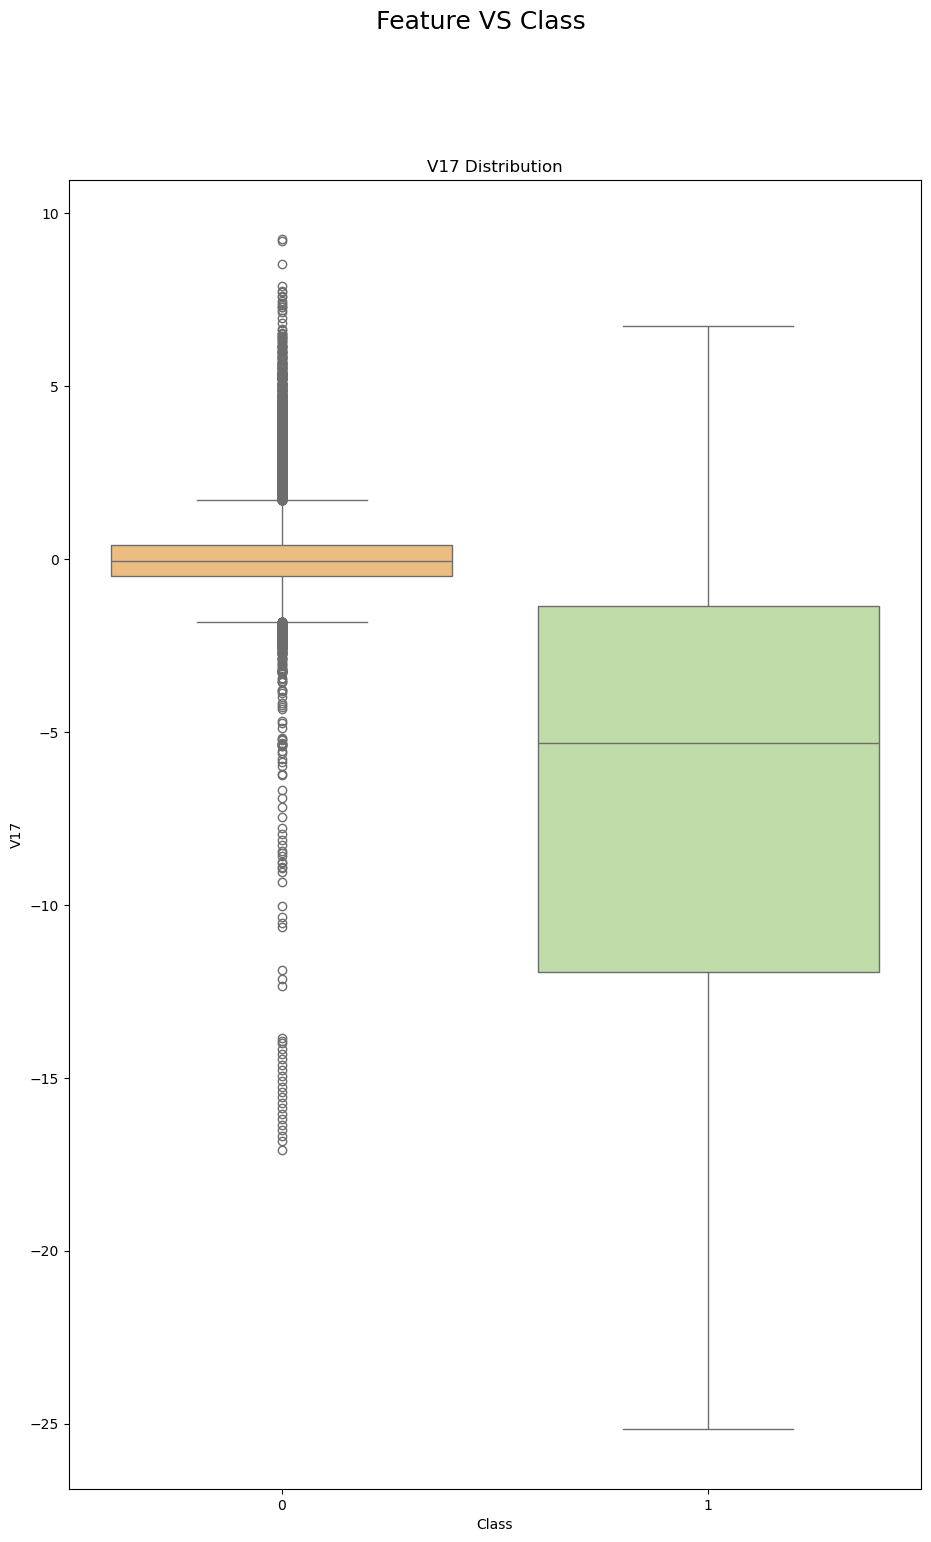

In [47]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V17", palette = "Spectral")
plt.title('V17 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\3544419050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V10", palette = "Spectral")


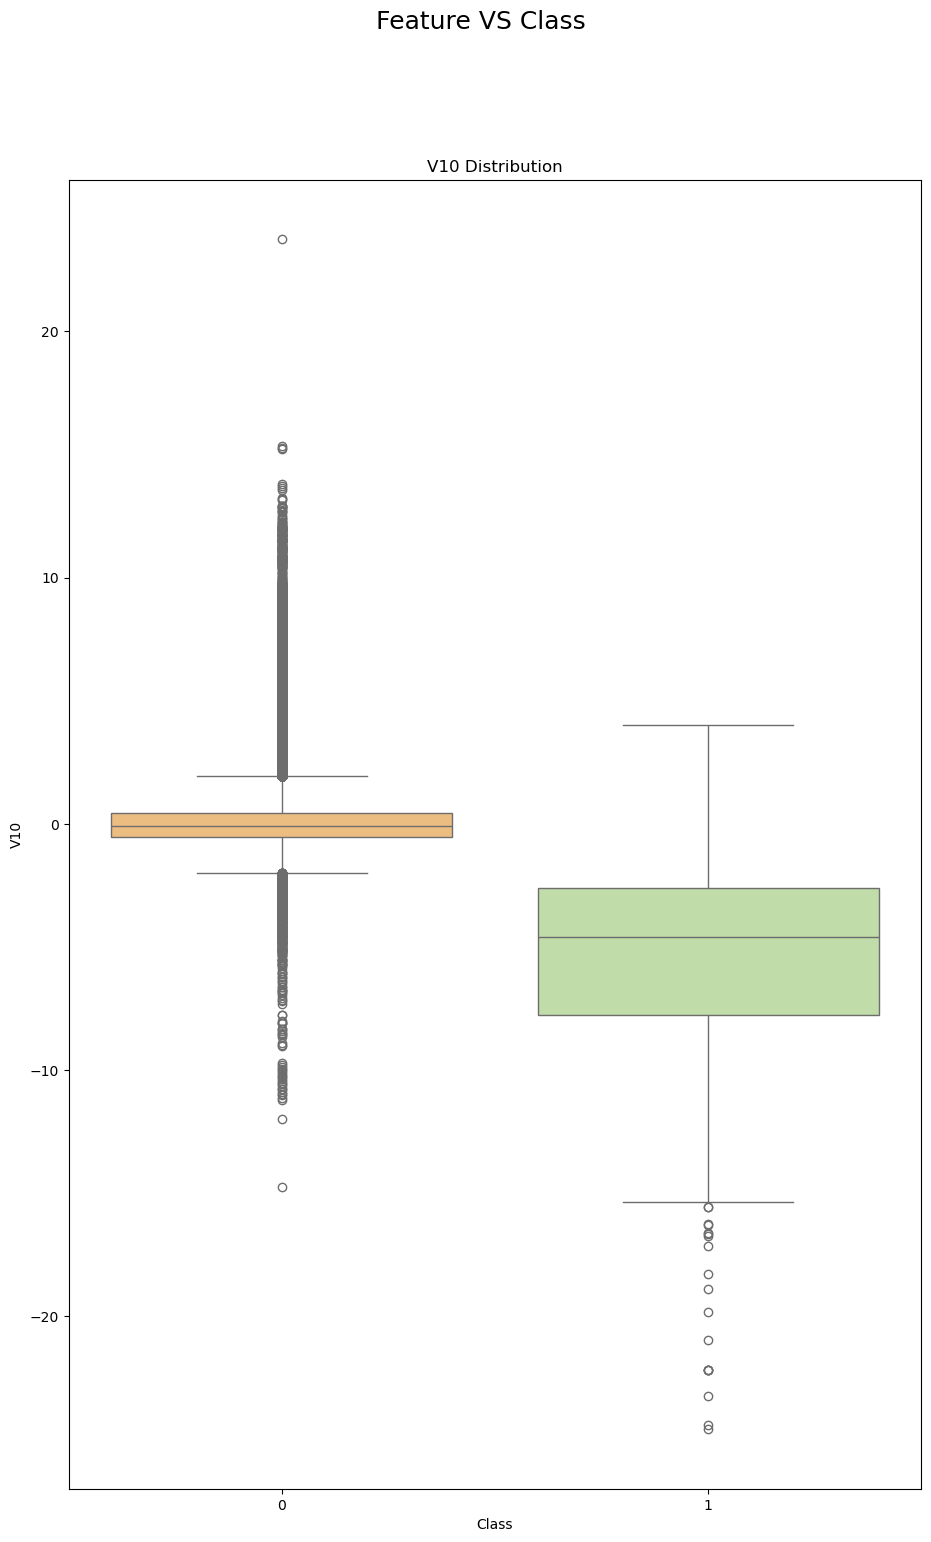

In [49]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V10", palette = "Spectral")
plt.title('V10 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\3319907551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V12", palette = "Spectral")


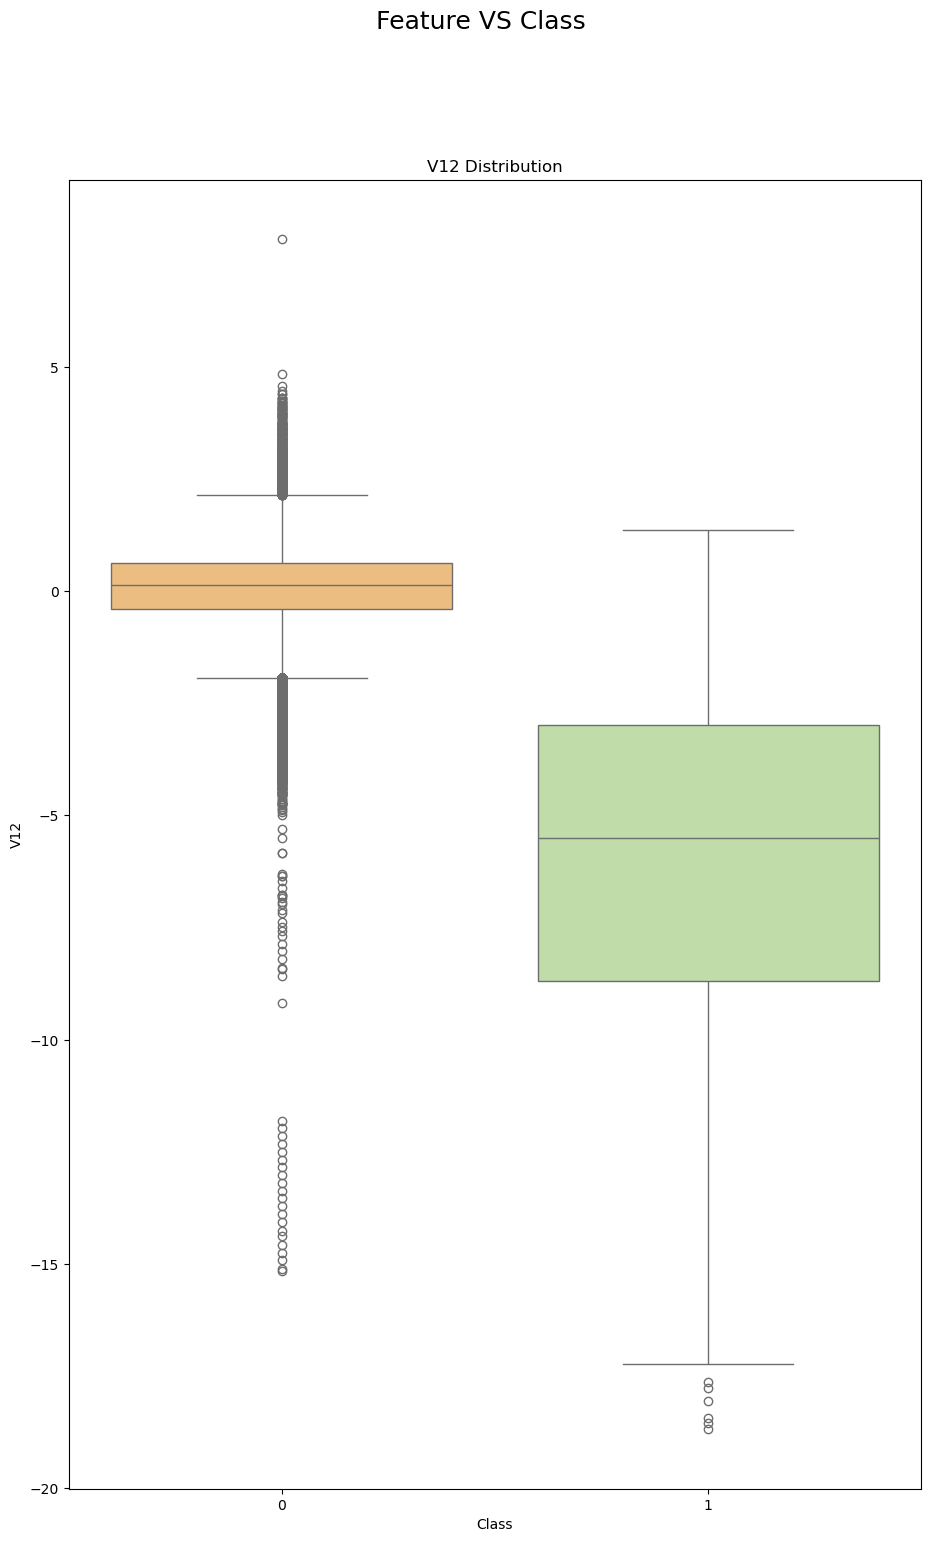

In [51]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V12", palette = "Spectral")
plt.title('V12 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\3233769805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V16", palette = "Spectral")


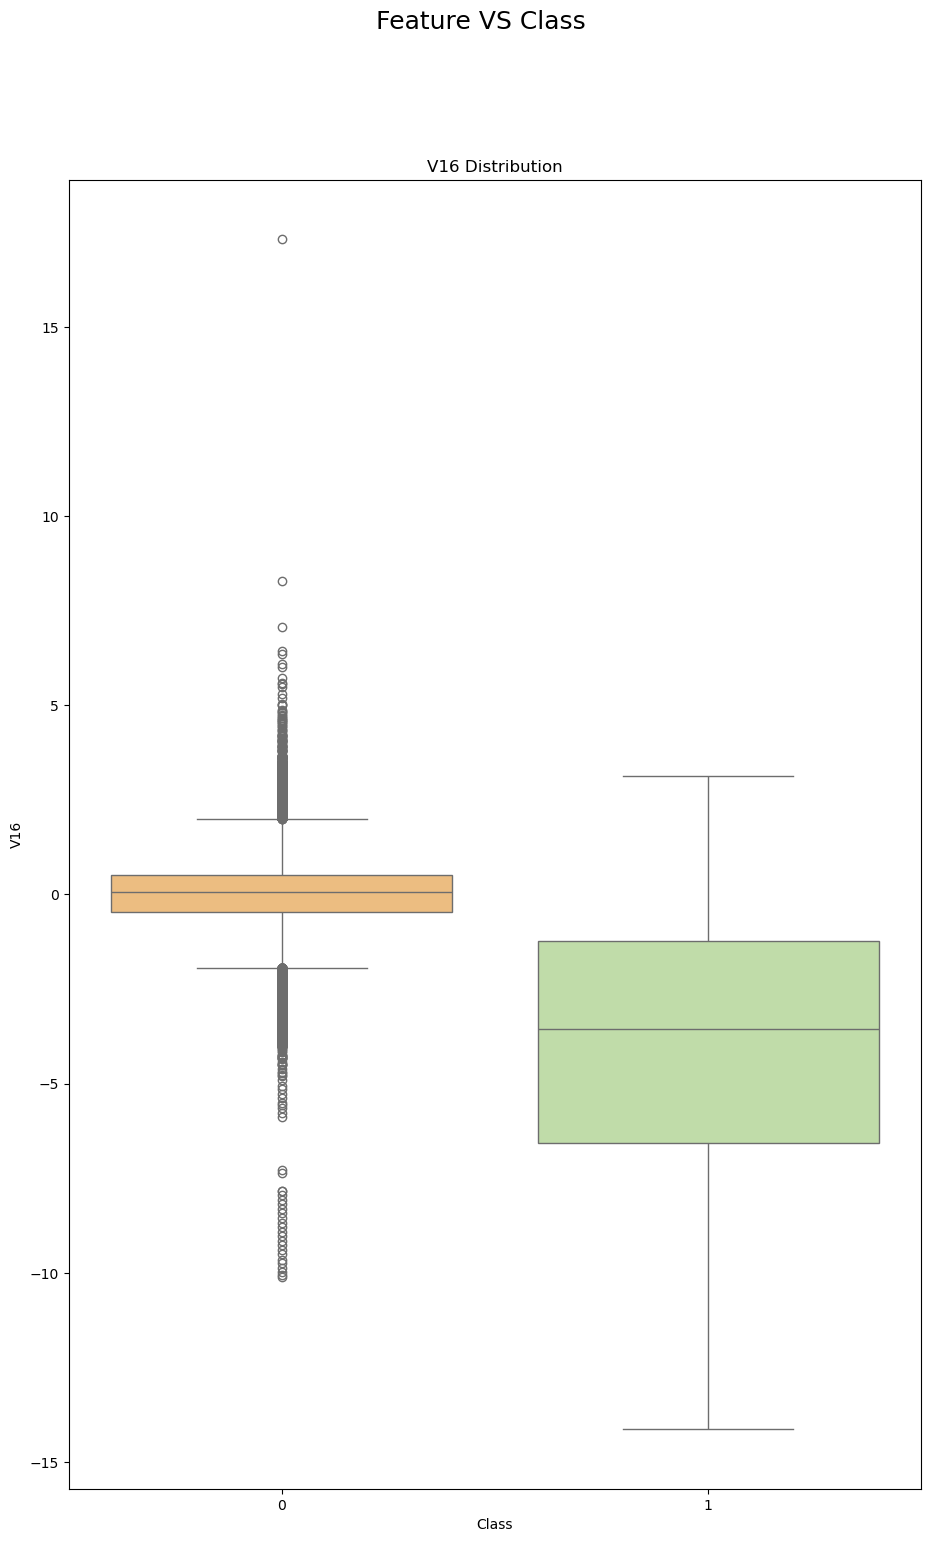

In [53]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V16", palette = "Spectral")
plt.title('V16 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\3232672148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V14", palette = "Spectral")


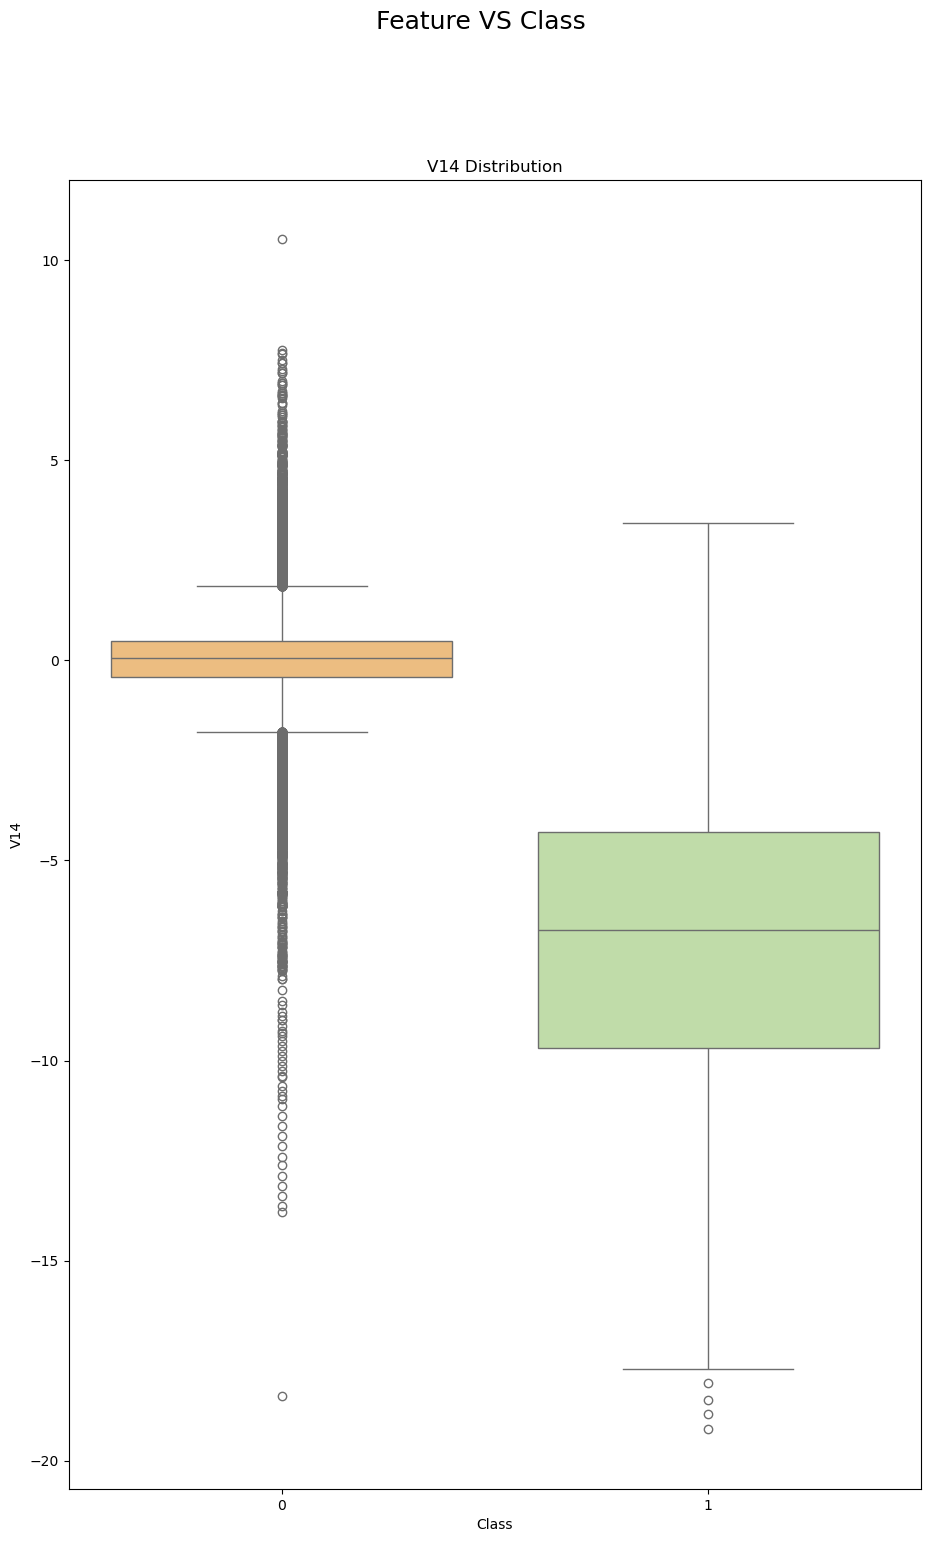

In [55]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V14", palette = "Spectral")
plt.title('V14 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\1099176135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V11", palette = "Spectral")


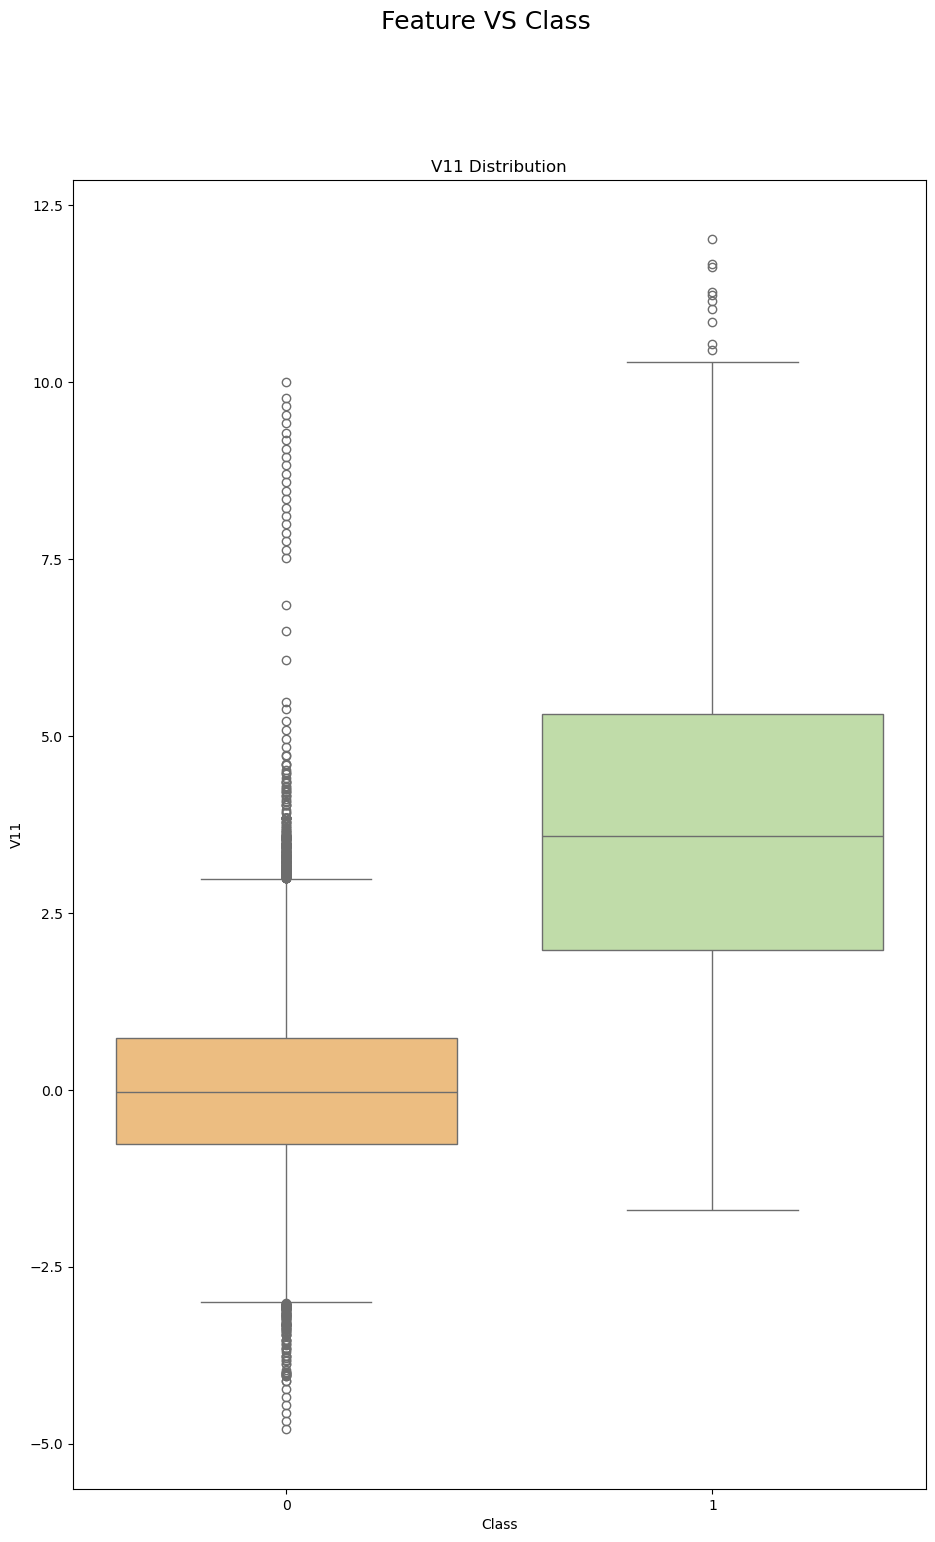

In [57]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V11", palette = "Spectral")
plt.title('V11 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\2707073174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V7", palette = "Spectral")


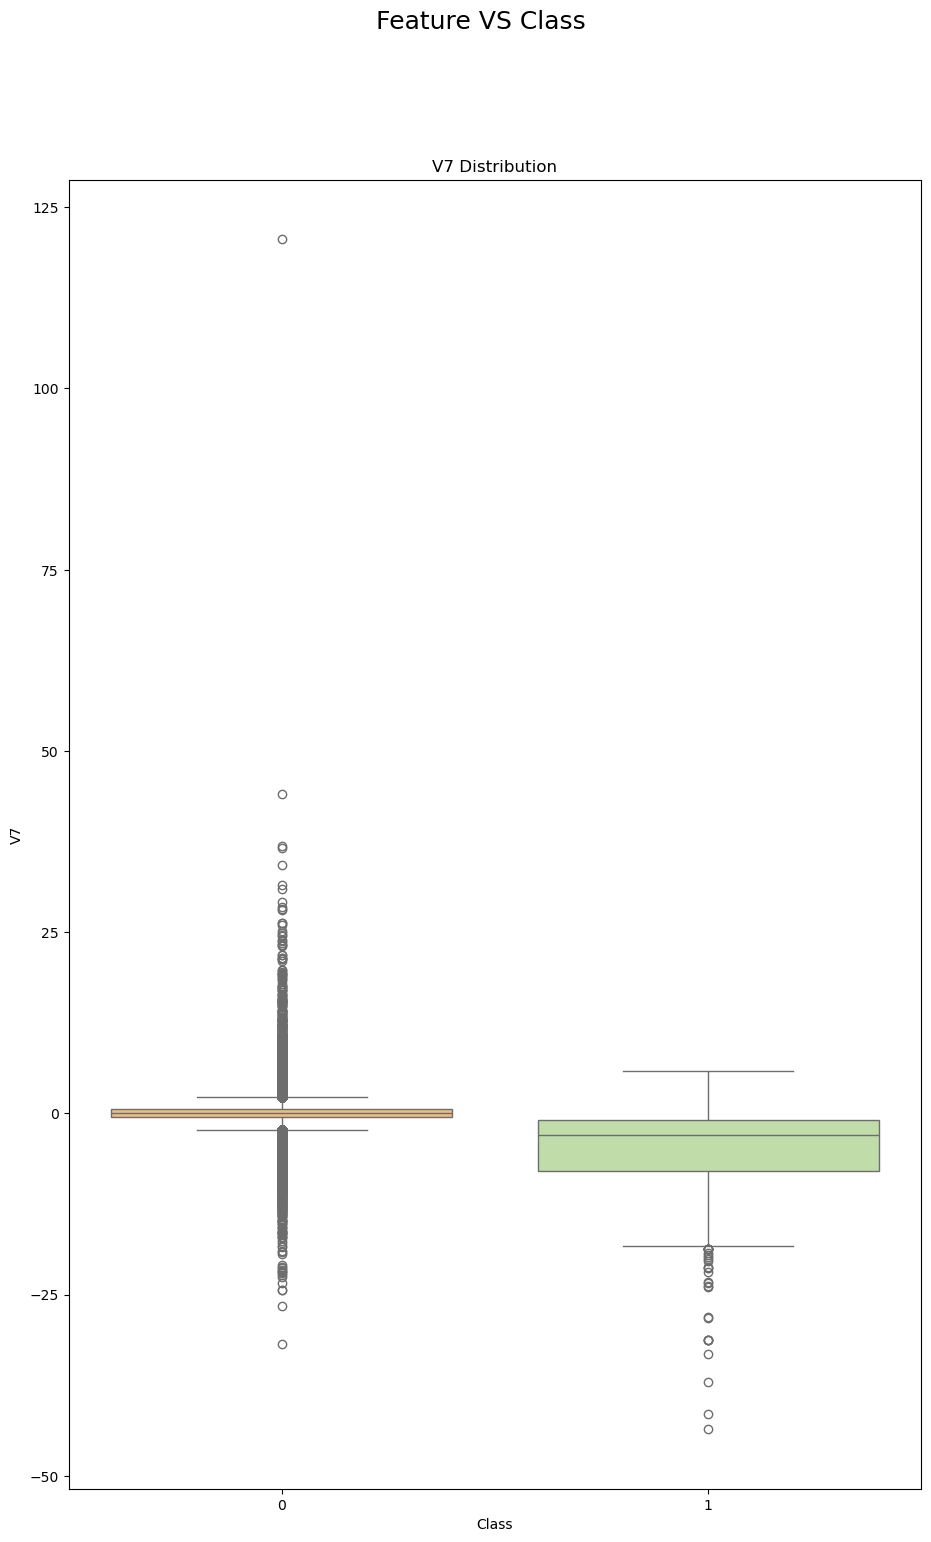

In [59]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V7", palette = "Spectral")
plt.title('V7 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\885781725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V4", palette = "Spectral")


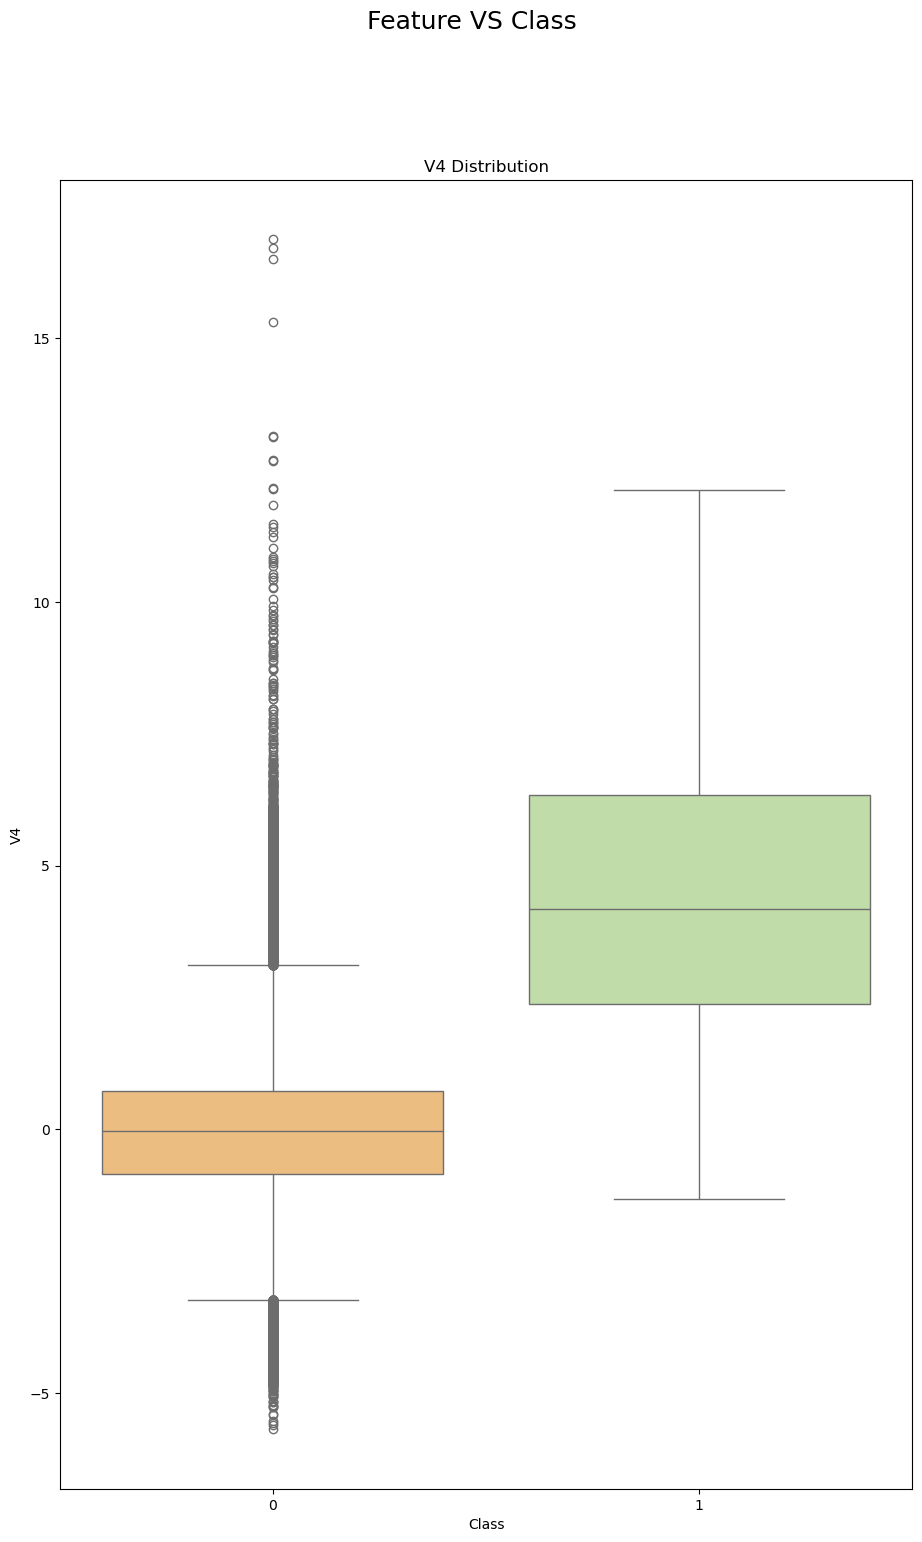

In [61]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V4", palette = "Spectral")
plt.title('V4 Distribution')
plt.show()

C:\Users\aride\AppData\Local\Temp\ipykernel_21756\1509163314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = cc_df, x = "Class", y = "V2", palette = "Spectral")


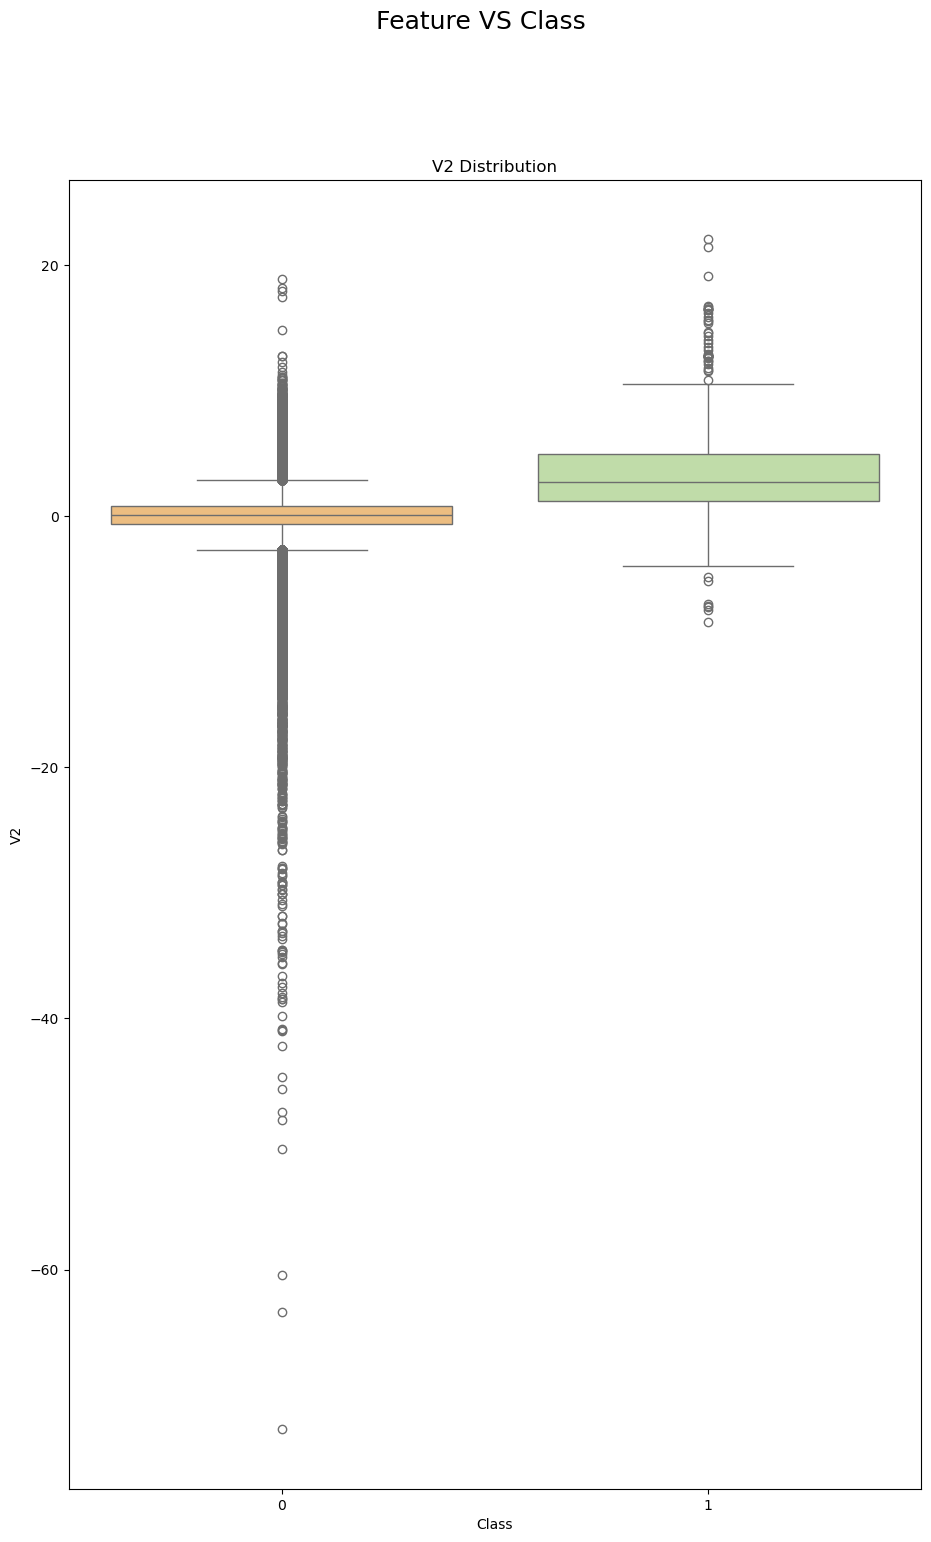

In [63]:
fig, axes = plt.subplots(figsize = (11, 17))
fig.suptitle('Feature VS Class', size = 18)

sns.boxplot(data = cc_df, x = "Class", y = "V2", palette = "Spectral")
plt.title('V2 Distribution')
plt.show()

## PLOTTING DISTRIBUTIONS USING HISTOGRAM

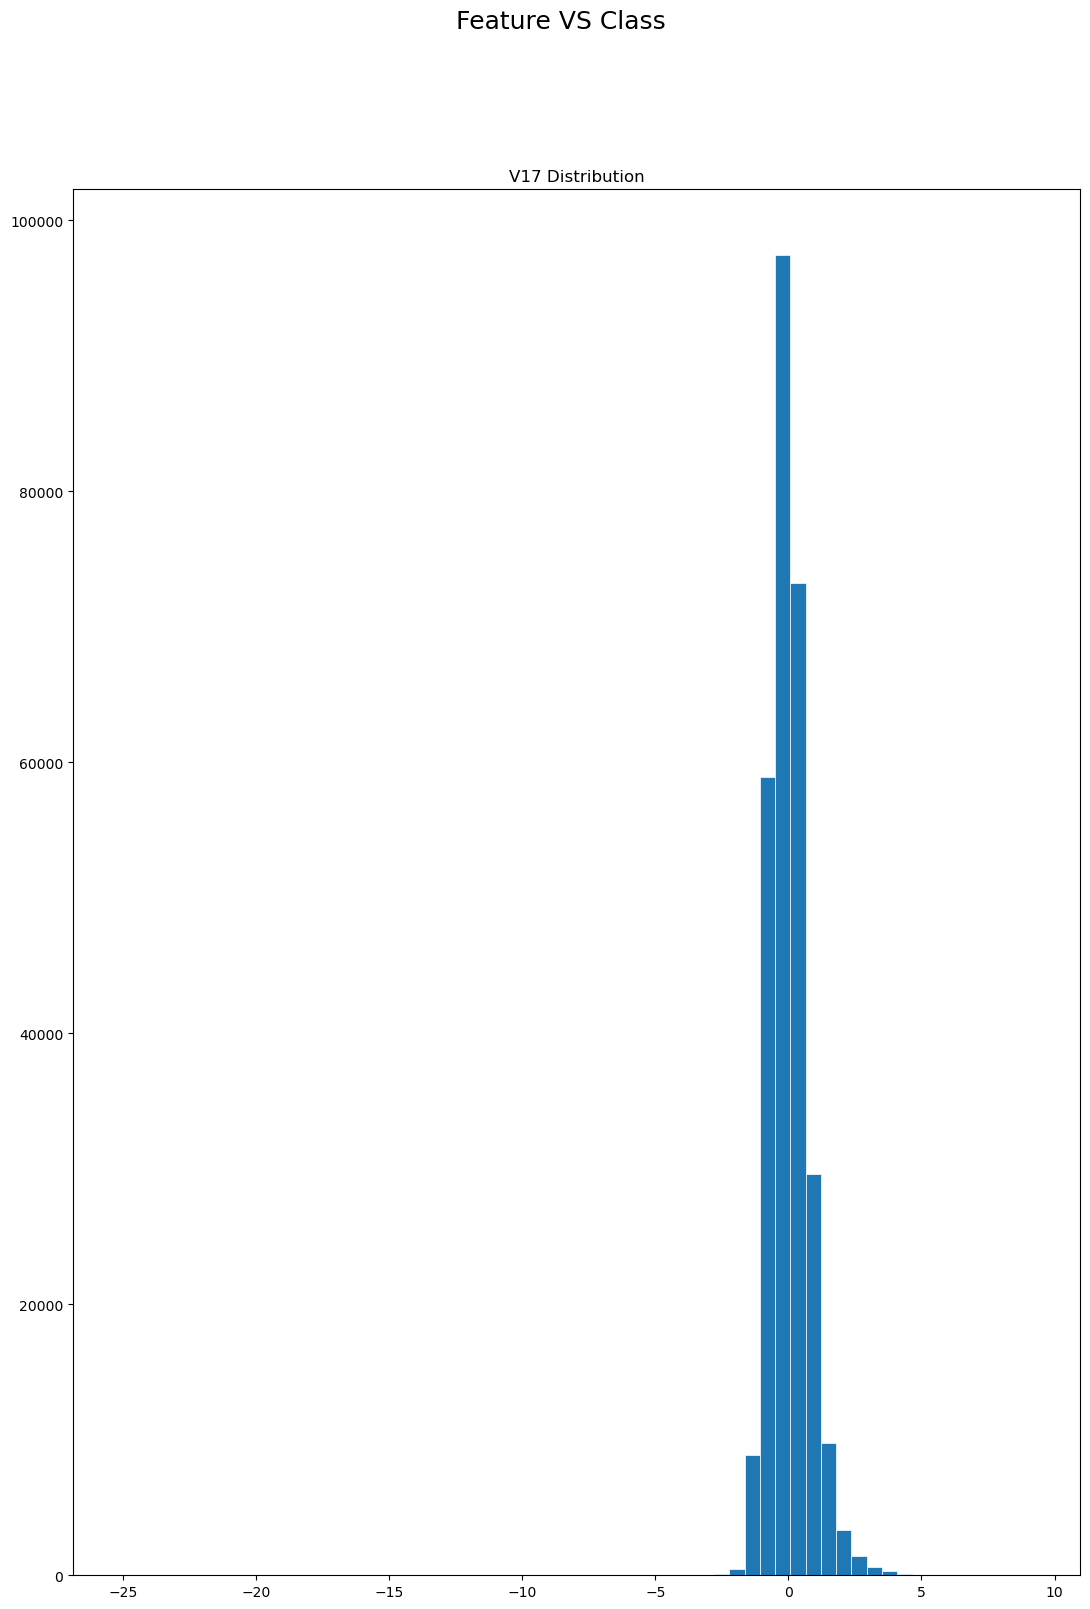

In [67]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V17'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V17 Distribution')
plt.show()

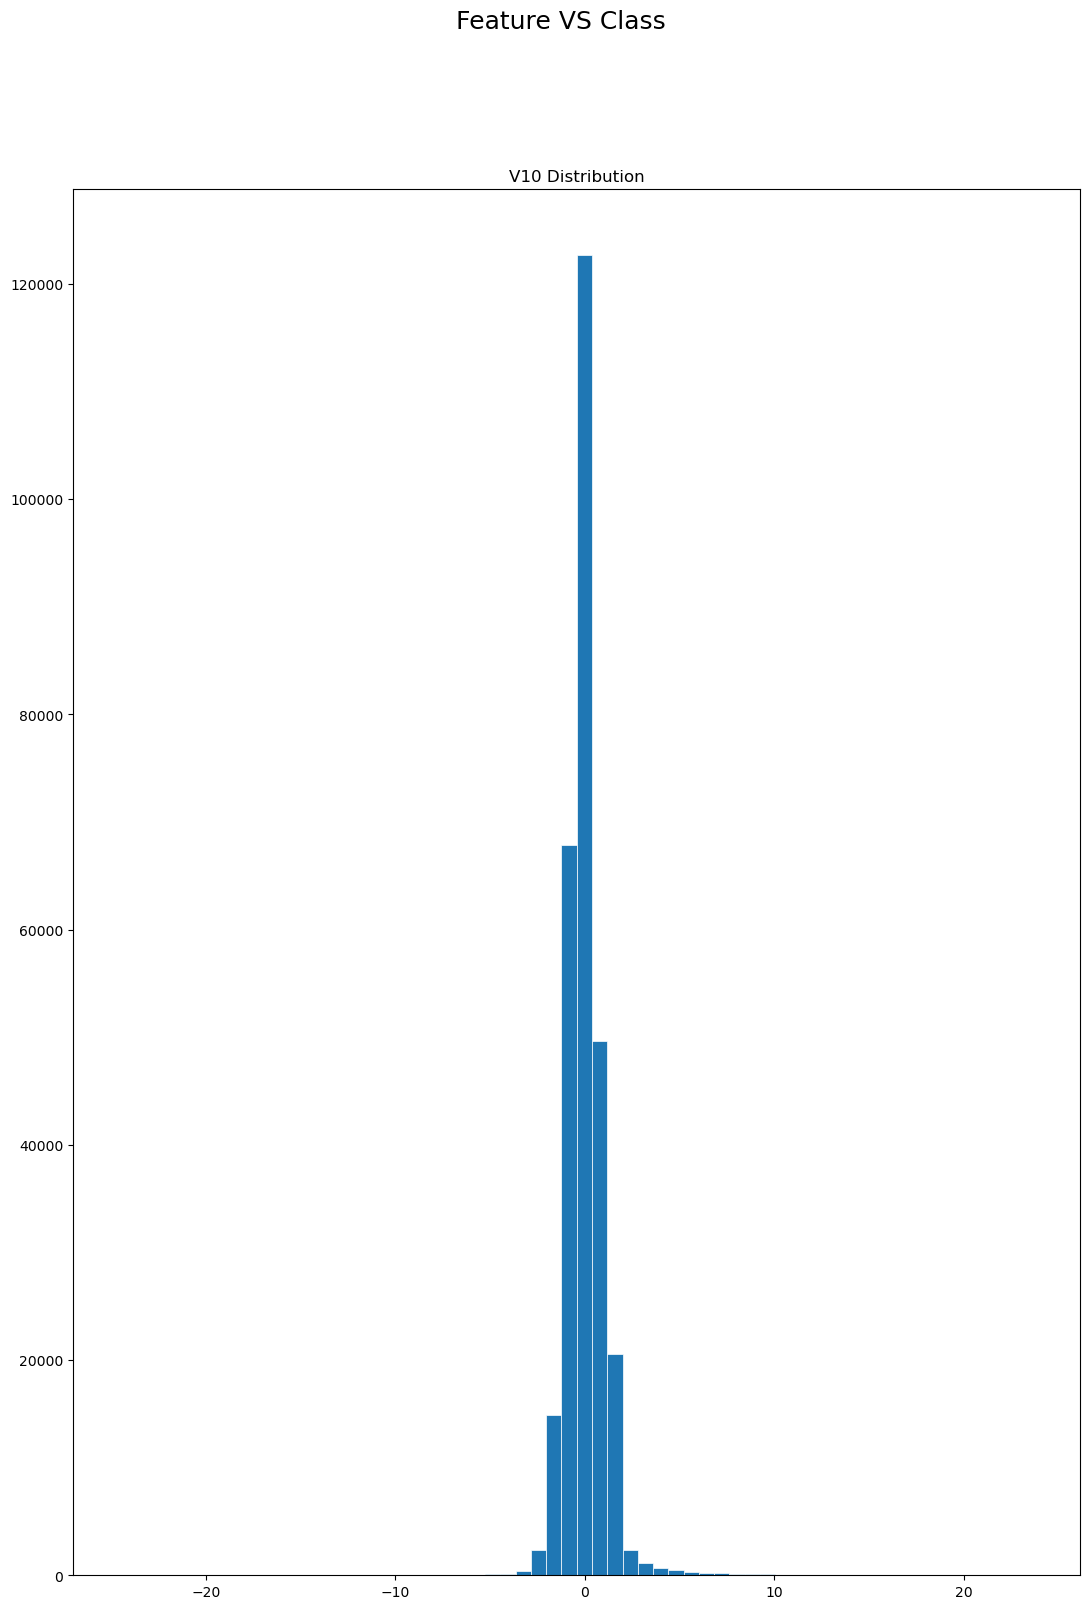

In [69]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V10'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V10 Distribution')
plt.show()

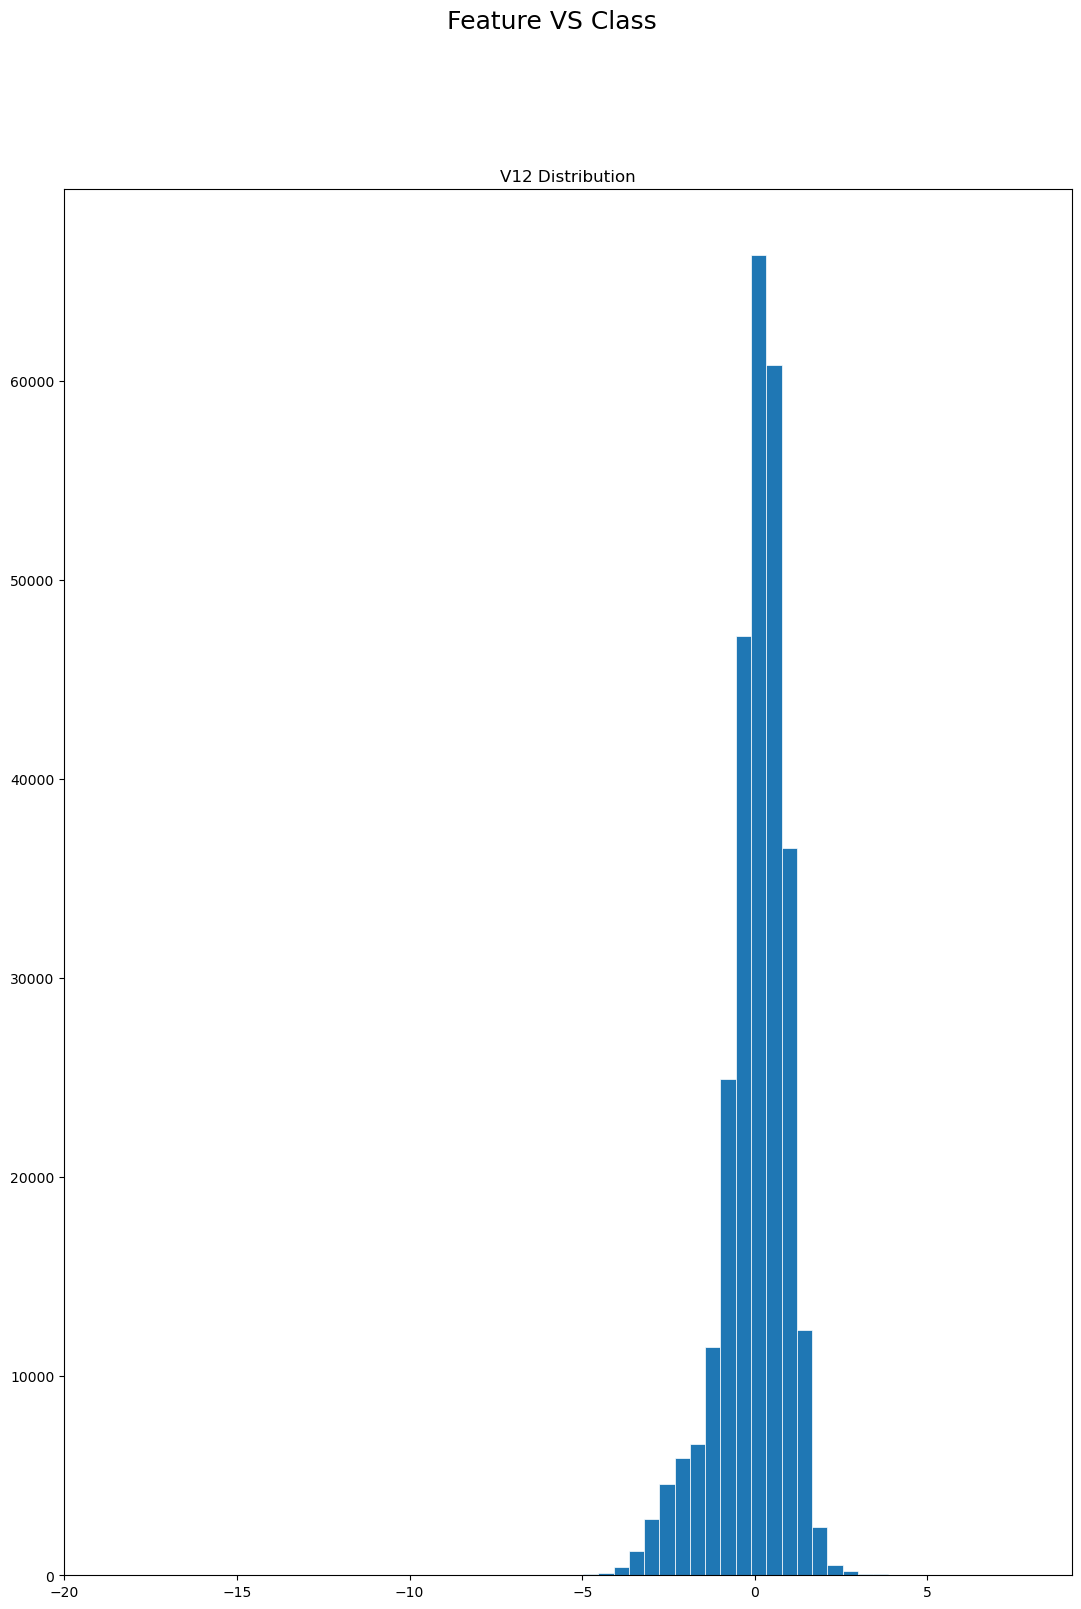

In [71]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V12'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V12 Distribution')
plt.show()

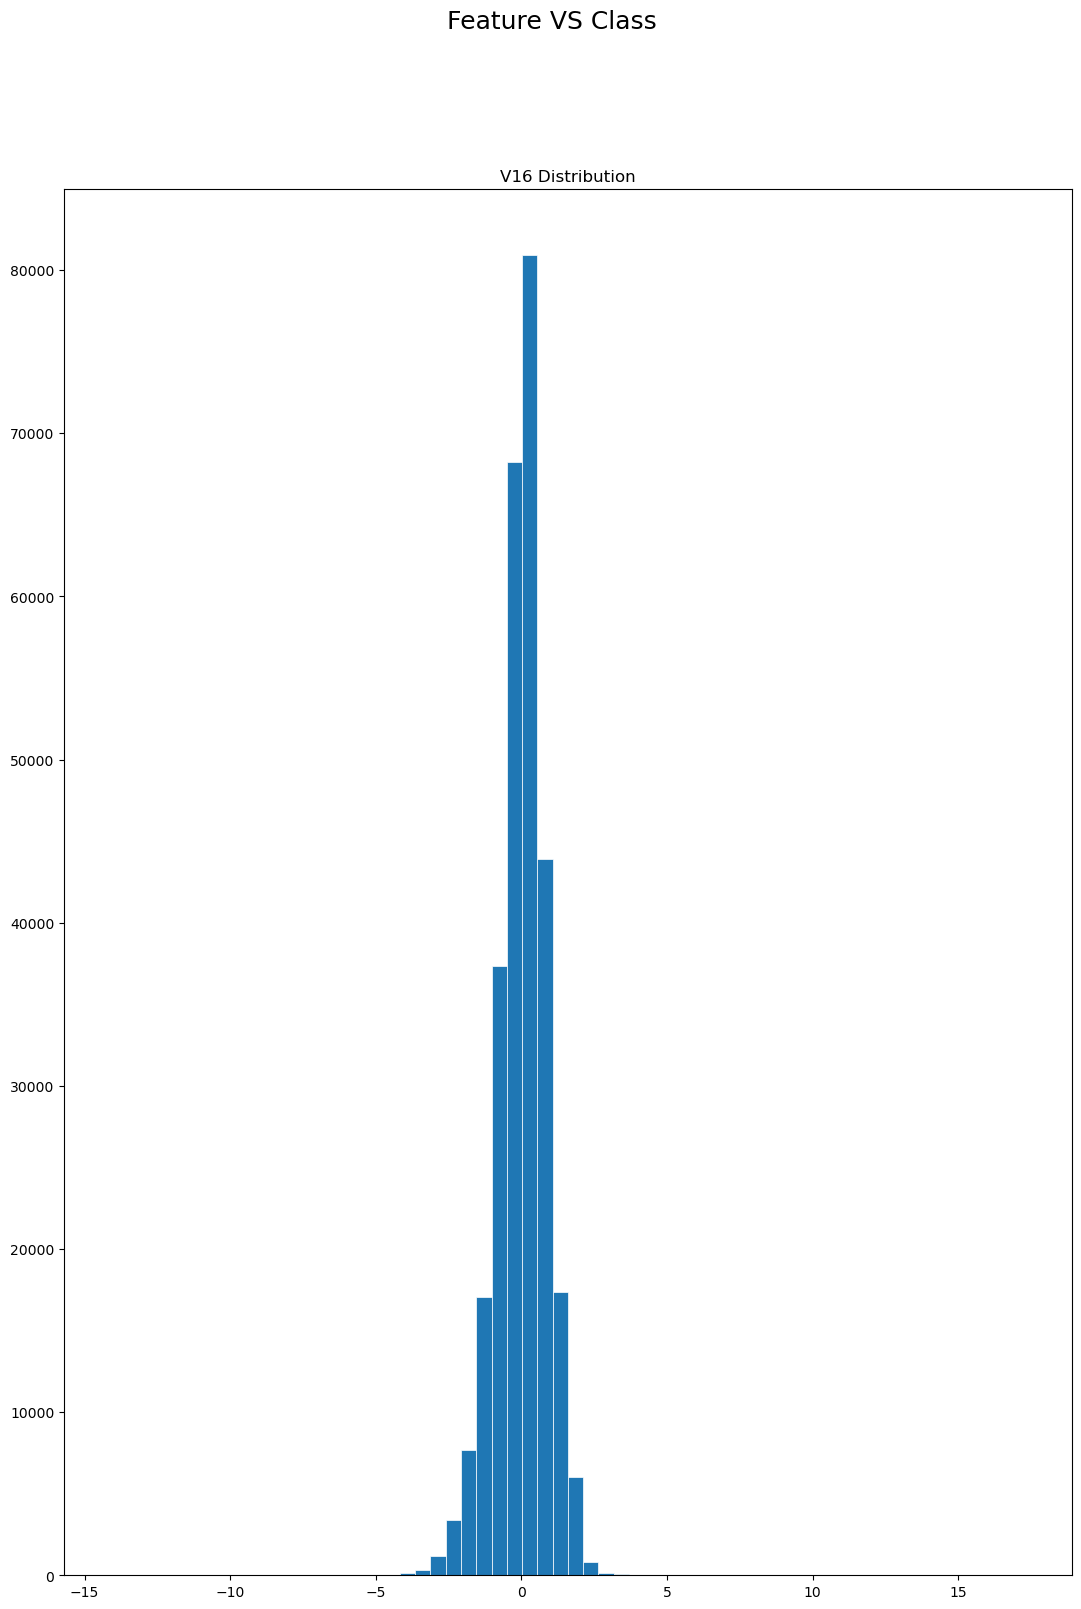

In [73]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V16'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V16 Distribution')
plt.show()

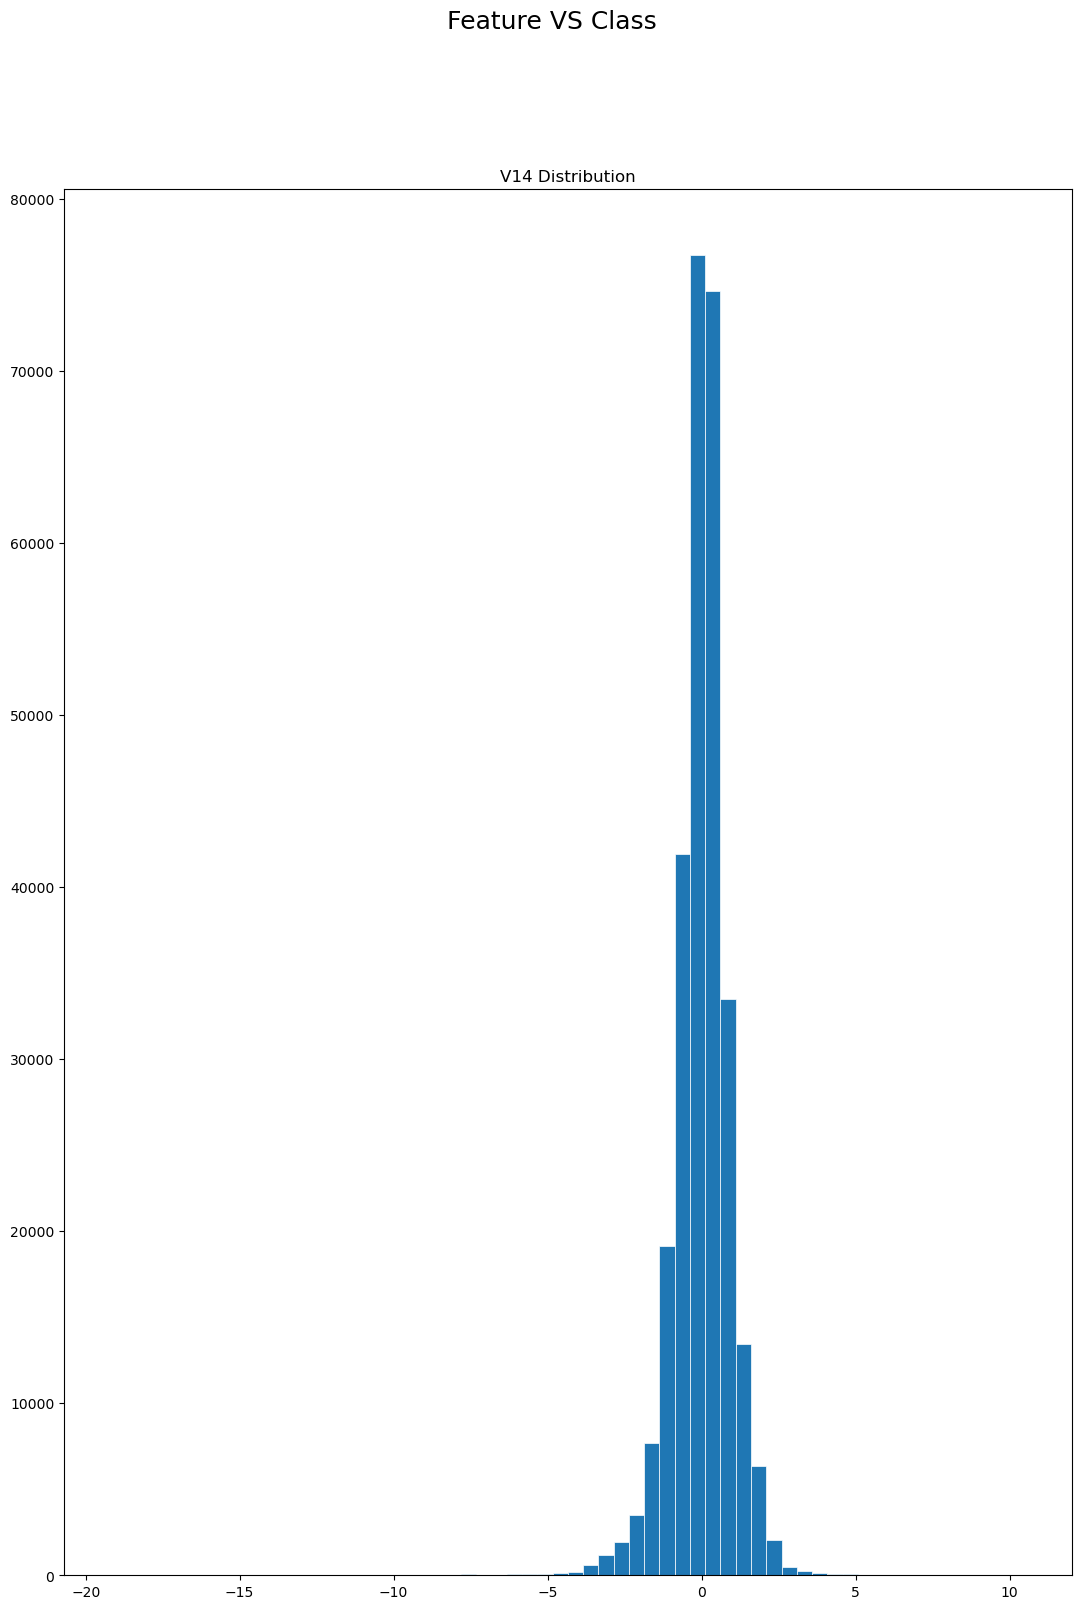

In [75]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V14'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V14 Distribution')
plt.show()

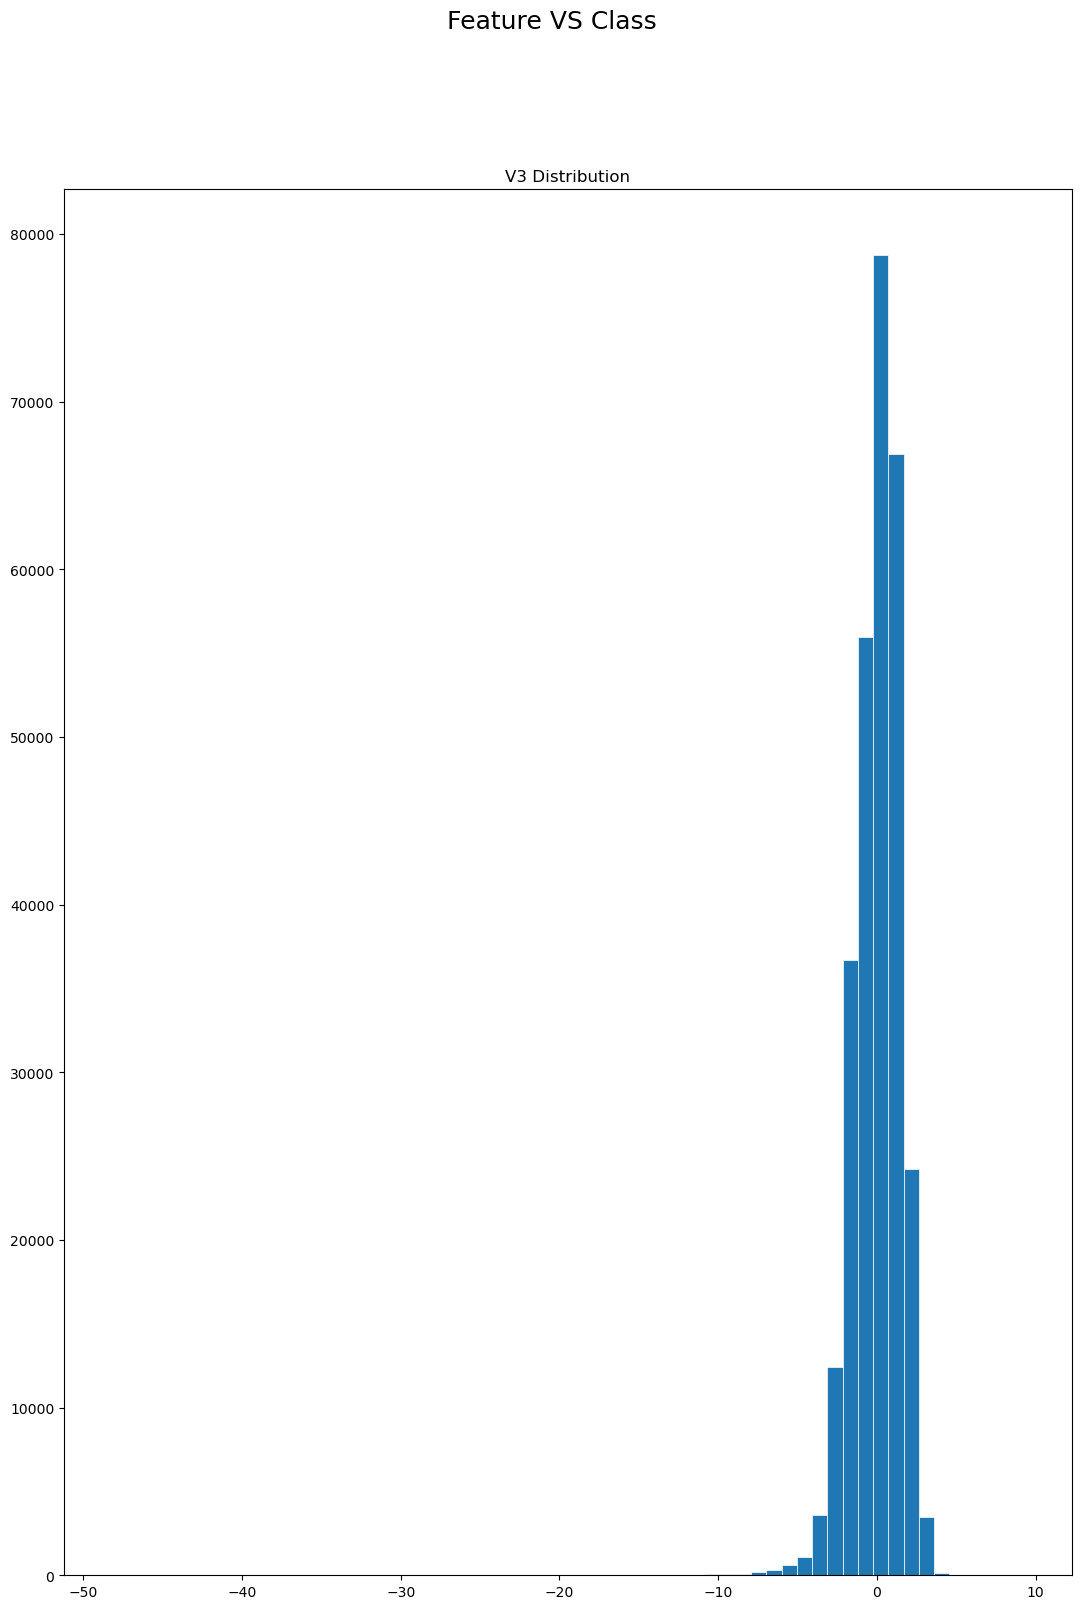

In [77]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V3'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V3 Distribution')
plt.show()

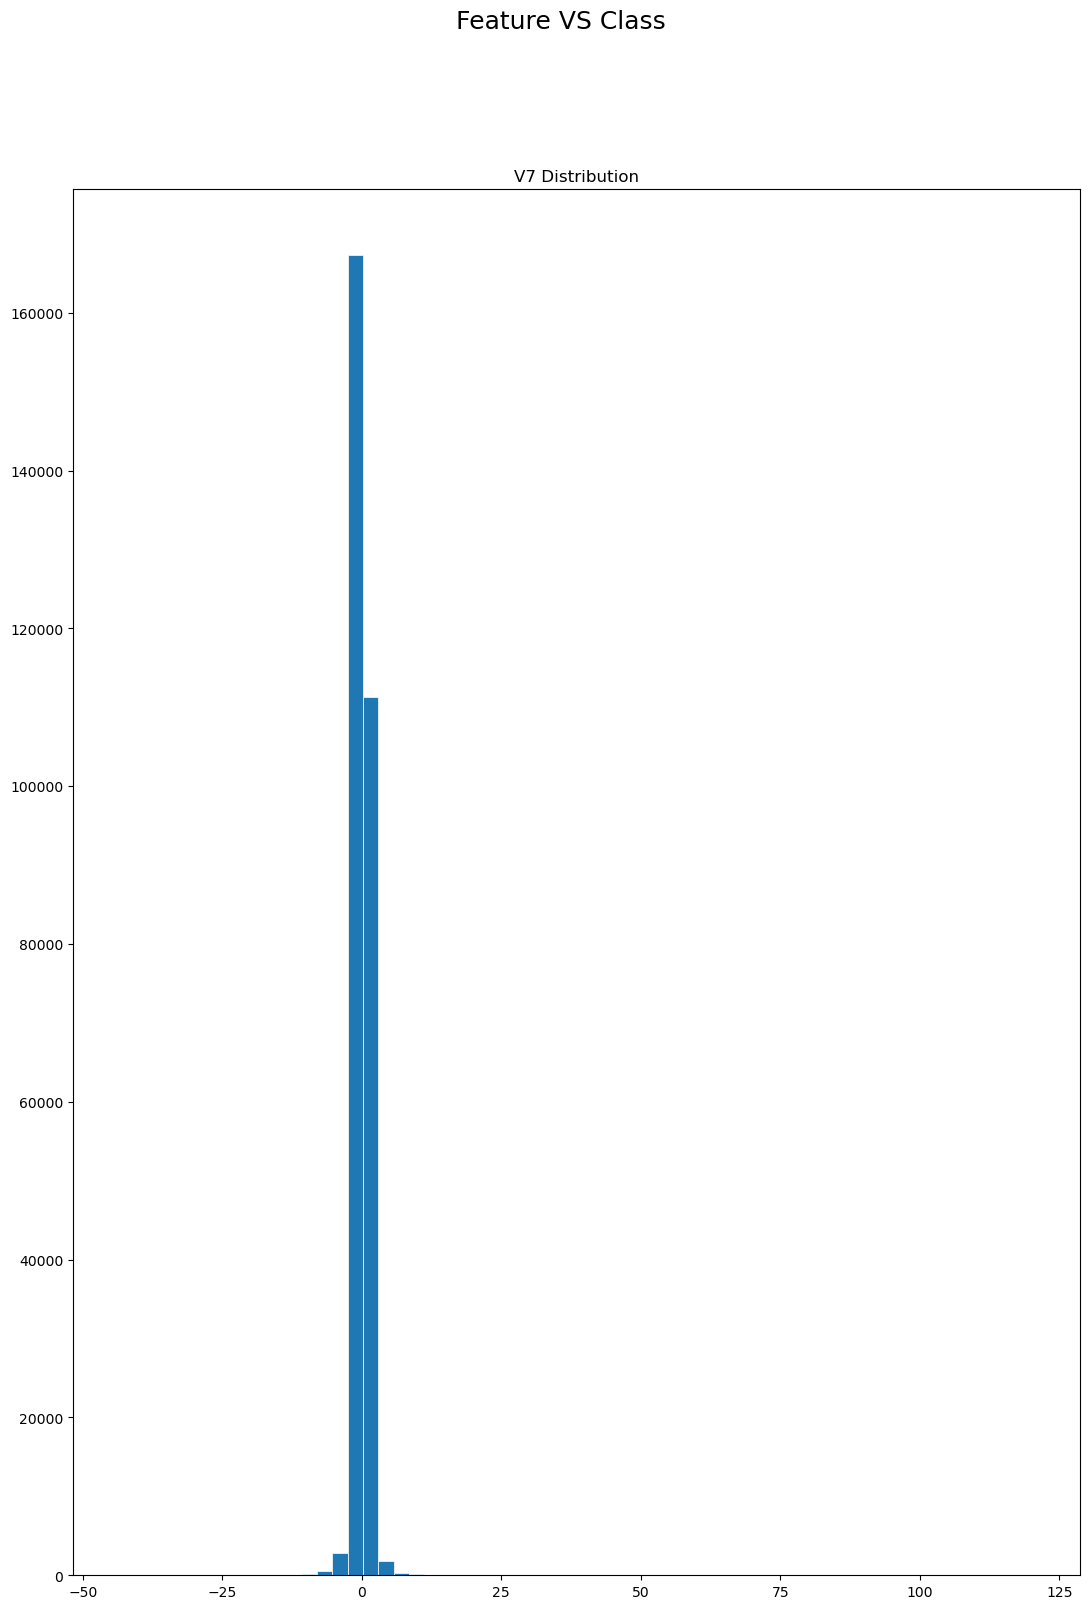

In [79]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V7'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V7 Distribution')
plt.show()

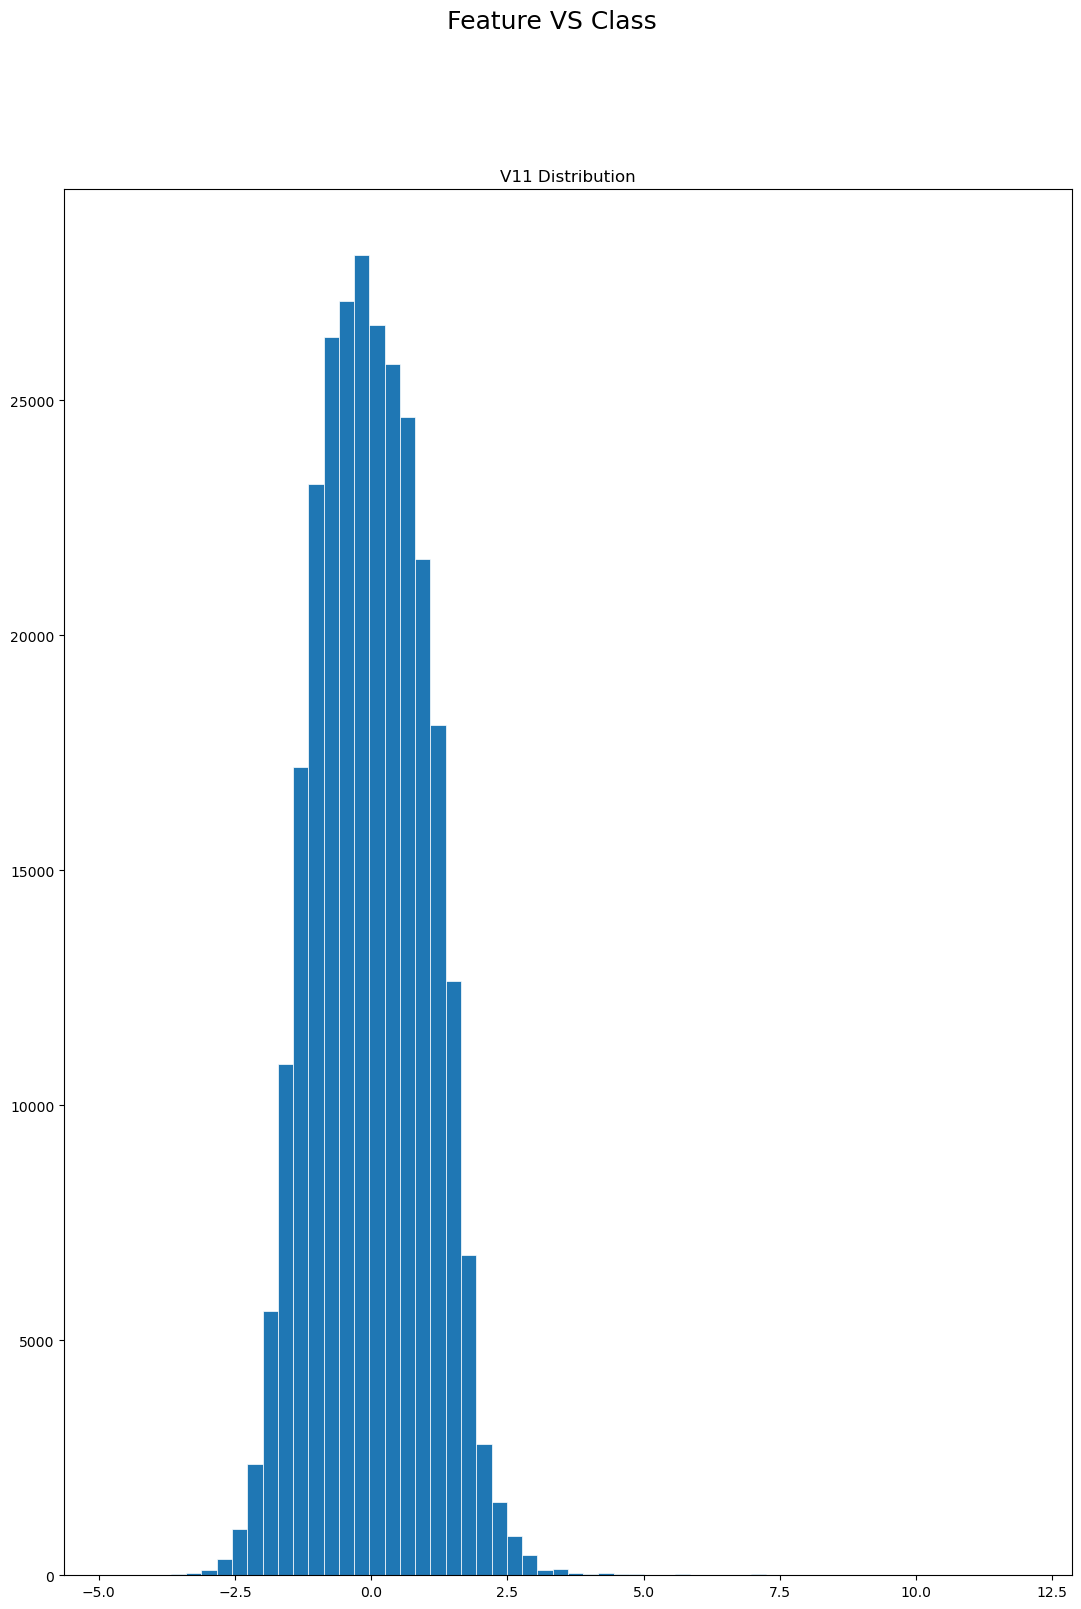

In [81]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V11'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V11 Distribution')
plt.show()

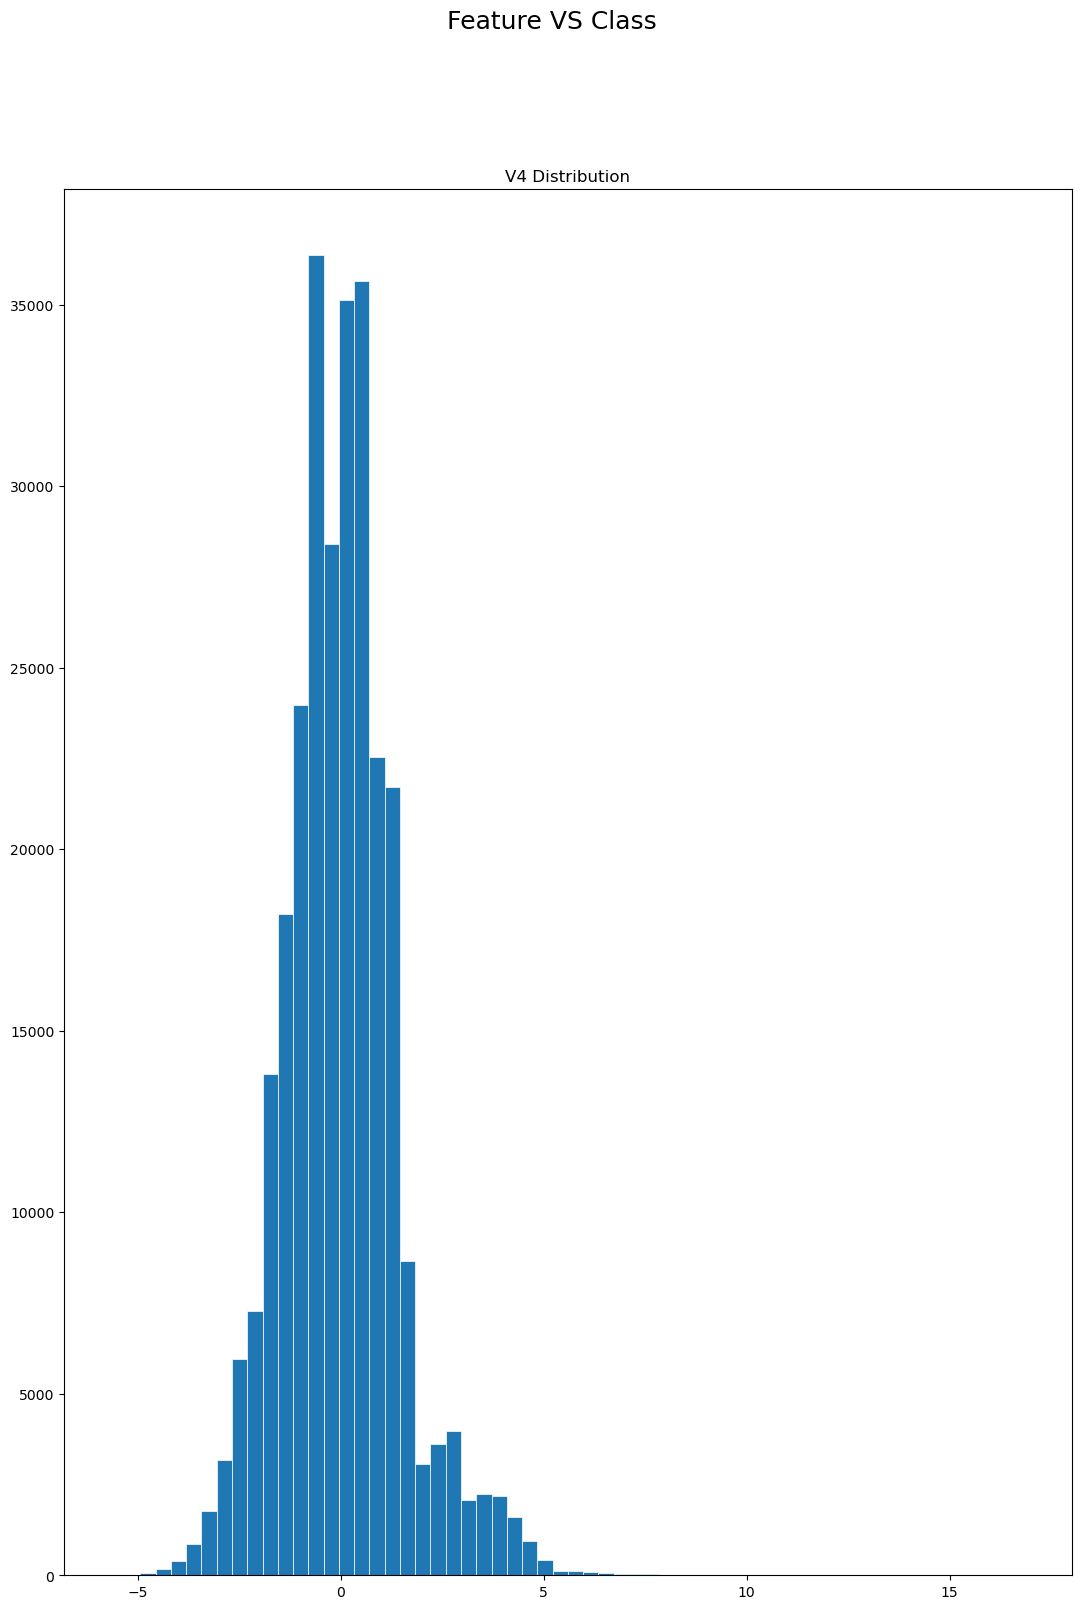

In [83]:
fig, axes = plt.subplots(figsize = (13,18))
plt.suptitle('Feature VS Class', size = 18)

plt.hist(cc_df['V4'], bins = 60, linewidth = 0.5, edgecolor = 'white')
plt.title('V4 Distribution')
plt.show()

## TUKEY'S IQR METHOD TO GET RID OF OUTLIERS

In [145]:
def IQR_method(df, n, column):
    outlier_list = []

    for col in column:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)

        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
        outlier_list.extend(outlier_list_column.index)

    multiple_outliers = [ k for k, v in Counter(outlier_list).items() if v > n]
    df1 = df[df[col] < Q1 - outlier_step]
    df2 = df[df[col] > Q3 + outlier_step]

    print('Total Outlier: ', df1.shape[0] + df2.shape[0])
    return multiple_outliers

In [147]:
Outlier_IQR = IQR_method(cc_df, 1, feature_list)

Total Outlier:  31904


In [149]:
cc_df_out = cc_df.drop(Outlier_IQR, axis = 0).reset_index(drop = True)
cc_df_out

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203372,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
203373,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
203374,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
203375,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## STANDARD DEVIATION METHOD

In [ ]:
def StDev_method(df, n, column):
    outlier_indices = []

    for col in column:
        data_mean = df[col].mean()
        data_std = df[col].std()

        cut_off = data_std * 3
        outlier_list_column = df[(df[col] < data_mean - cut_off) | (df[col] > data_mean + cut_off)].index
        outlier_indices.extend(outlier_list_column)

    outlier_indices = Counter(outlier_indices)

    multiple_outlier = [ k for k, v in outlier_indices.items() if v > n ]

    df1 = df[df[column[0]] > data_mean + cut_off]
    df2 = df[df[column[0]] < data_mean - cut_off]

    print('Total Outliers:', len(multiple_outlier))
    return multiple_outlier

In [197]:
Outlier_StDev = StDev_method(cc_df, 1, feature_list)
df_out_2 = cc_df.drop(Outlier_StDev, axis = 0).reset_index(drop = True)

Total Outliers: 14523


## Z SCORE METHOD

In [229]:
from collections import Counter

def z_score_method(df, n, features):
    outlier_indices = {}
    threshold = 3

    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()

        z_score = abs((df[column] - data_mean) / data_std)

        outlier_indices[column] = df.index[z_score > threshold].tolist()

    # Sum lengths of all outlier lists correctly
    total_outliers = sum(len(indices) for indices in outlier_indices.values())
    print('Total Outliers: ', total_outliers)

    # Keep only features where number of outliers > n
    multiple_outliers = {feature: indices for feature, indices in outlier_indices.items() if len(indices) > n}

    return multiple_outliers

In [231]:
Outliers_z_score = z_score_method(cc_df, 1, feature_list)

outlier_indices = [index for indices in Outliers_z_score.values() for index in indices]

df_out_3 = cc_df.drop(index=outlier_indices).reset_index(drop=True)

Total Outliers:  83598


## MODIFIED Z-SCORE

In [235]:
from scipy.stats import median_abs_deviation

In [241]:
def z_scoremod_method(df, n, features):
    outlier_list = []
    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()

        threshold = 3

        MAD = median_abs_deviation(df[column])
        mod_z_score = abs((0.6745 * (df[column] - data_mean)) / MAD)

        outlier_list_column = df[mod_z_score > threshold].index
        outlier_list.extend(outlier_list_column)

    outlier_list = Counter(outlier_list)
    multiple_outliers = [ k for k, v in outlier_list.items() if v > n]

    df1 = df[df.index.isin(multiple_outliers)]
    print('Total Outliers:', df1.shape[0])

    return multiple_outliers

In [243]:
Outliers_z_score = z_scoremod_method(cc_df, 1, feature_list)
df_out4 = cc_df.drop(Outliers_z_score, axis = 0).reset_index(drop = True)

Total Outliers: 64936
